<a href="https://colab.research.google.com/github/PrimaVandayani/DATA-ANALYTICS/blob/PrimaVandayani-patch-1/latihan_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. IDENTIFIKASI MASALAH**

*   H0 = Tidak terdapat pengaruh tingkat penjualan wine terhadap tingkat penjualan daging
*   Ha = Terdapat pengaruh tingkat penjualan wine terhadap tingkat penjualan daging



**B. PENGUMPULAN DAN REVIEW DATA**

1. import library
2. import data
3. baca 5 data teratas
4. informasi data
5. pemilihan 2 variabel sesuai hipotesis



In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#IMPORTING THE DATA
data_excel=pd.read_excel('marketing_campaign.xlsx')

#MEMBACA 5 DATA TERATAS
data_excel.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
#MEMILIH KOLOM SESUAI HIPOTESIS
data_hipo=data_excel[['MntWines','MntMeatProducts']]
data_hipo

,MntWines,MntMeatProducts
0,635,546
1,11,6
2,426,127
3,11,20
4,173,118
...,...,...
2235,709,182
2236,406,30
2237,908,217
2238,428,214


**C. DATA WRANGLING**

1. merubah nama kolom sesuai yang dihipotesiskan
2. memeriksa data kosong (missining values) pada kedua variabel
3. memeriksa data outliers pada kedua variabel
4. memeriksa kenormalan distribusi data pada kedua variabel
5. pemeriksaan data duplikat tidak dilakukan karena memungkinkan bila ada kesamaan data pada kedua variabel






In [ ]:
#MERUBAH NAMA KOLOM
data_hipo.columns=['Tingkat Pembelian Wine','Tingkat Pembelian Daging']
data_hipo

,Tingkat Pembelian Wine,Tingkat Pembelian Daging
0,635,546
1,11,6
2,426,127
3,11,20
4,173,118
...,...,...
2235,709,182
2236,406,30
2237,908,217
2238,428,214


In [ ]:
#MEMERIKSA MISSING VALUE (DATA KOSONG)
data_hipo.isna().sum().sum()

0

***KESIMPULAN: tidak ditemukan data kosong***

<Axes: xlabel='Tingkat Pembelian Wine'>

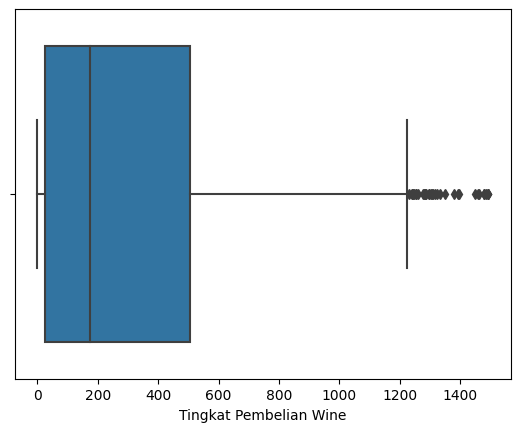

In [ ]:
#MEMERIKSA DATA OUTLIERS
sns.boxplot(x='Tingkat Pembelian Wine',data=data_hipo)

<Axes: xlabel='Tingkat Pembelian Daging'>

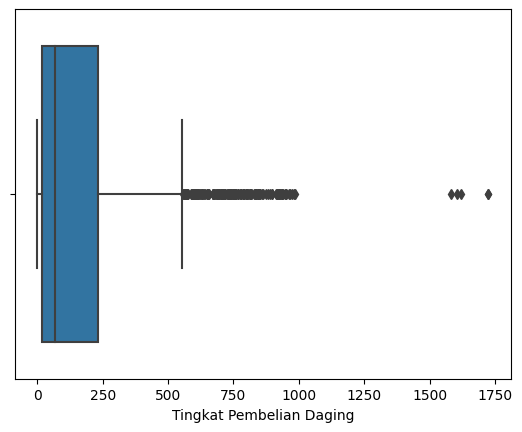

In [ ]:
sns.boxplot(x='Tingkat Pembelian Daging',data=data_hipo)

***KESIMPULAN : data outlier masih dalam batas toleransi karena tidak ditemukan tanda bintang (menunjukkan data sangat ekstrim)***

<Axes: ylabel='Frequency'>

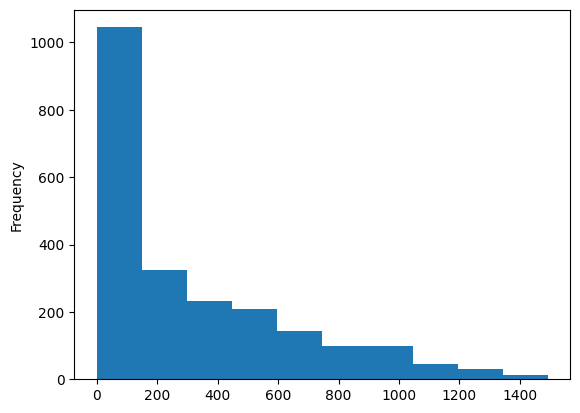

In [ ]:
#MEMERIKSA KENORMALAN DISTRIBUSI DATA
data_hipo['Tingkat Pembelian Wine'].plot(kind='hist')

<Axes: ylabel='Frequency'>

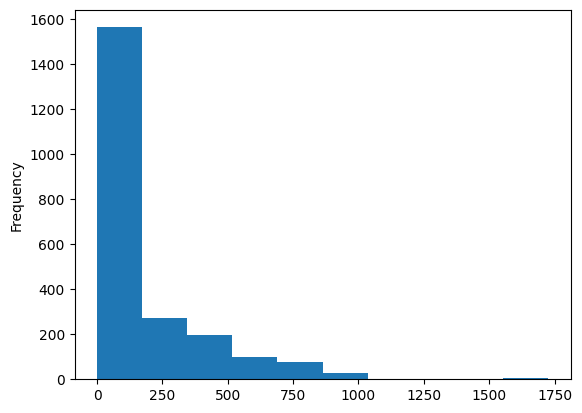

In [ ]:
data_hipo['Tingkat Pembelian Daging'].plot(kind='hist')

<Axes: xlabel='Tingkat Pembelian Wine', ylabel='Density'>

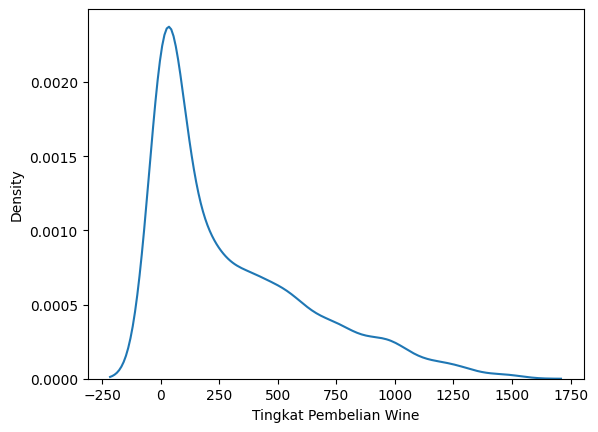

In [ ]:
sns.kdeplot(data_hipo['Tingkat Pembelian Wine'])

<Axes: xlabel='Tingkat Pembelian Daging', ylabel='Density'>

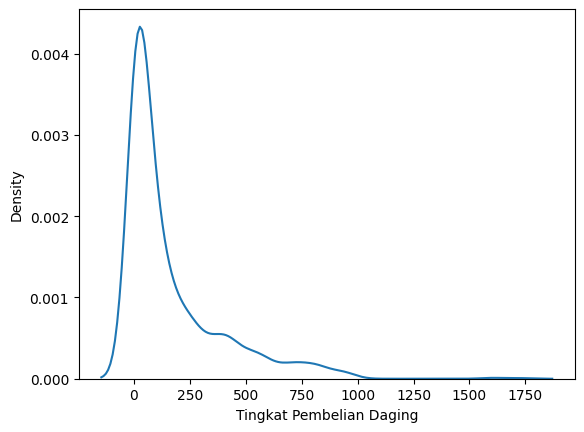

In [ ]:
sns.kdeplot(data_hipo['Tingkat Pembelian Daging'])

<ipython-input-32-fc7643a65f3e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_hipo,color='red',shade=True)


<Axes: ylabel='Density'>

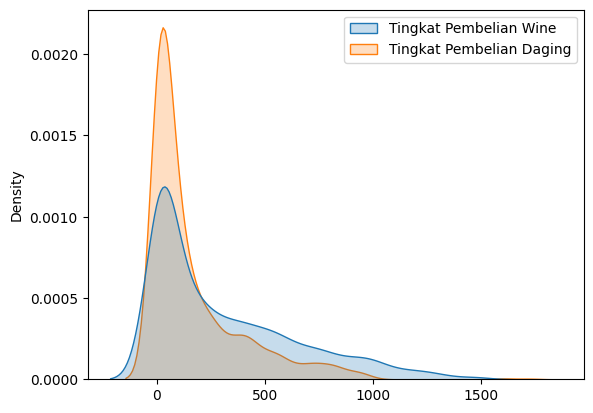

In [ ]:
sns.kdeplot(data_hipo,color='red',shade=True)

***KESIMPULAN : data tidak terdistribusi normal, dimana sebaran data condong ke kanan***

**D. DATA ANALYSIS, VISUALISASI & KESIMPULAN**

1. analisis deskriptif pada kedua variabel
2. korelasi antara kedua variabel
3. regresi linear sederhana



In [ ]:
#DESKRIPTIF
data_hipo.describe()

,Tingkat Pembelian Wine,Tingkat Pembelian Daging
count,2240.000000,2240.000000
mean,303.935714,166.950000
std,336.597393,225.715373
min,0.000000,0.000000
25%,23.750000,16.000000
50%,173.500000,67.000000
75%,504.250000,232.000000
max,1493.000000,1725.000000


In [ ]:
varians=data_hipo['Tingkat Pembelian Wine'].var()
varians

113297.80470873478

In [ ]:
kurtosis1=data_hipo['Tingkat Pembelian Wine'].kurtosis()
skewness1=data_hipo['Tingkat Pembelian Wine'].skew()
varians1=data_hipo['Tingkat Pembelian Wine'].var()
print('Kurtosis dari Tingkat Pembelian Wine=',kurtosis1)
print('Skewness dari Tingkat Pembelian Wine=',skewness1)
print('Varians dari Tingkat Pembelian Wine=',varians1)

Kurtosis dari Tingkat Pembelian Wine= 0.5987435935182441
Skewness dari Tingkat Pembelian Wine= 1.1757705637550502
Varians dari Tingkat Pembelian Wine= 113297.80470873478


In [ ]:
kurtosis2=data_hipo['Tingkat Pembelian Daging'].kurtosis()
skewness2=data_hipo['Tingkat Pembelian Daging'].skew()
varians2=data_hipo['Tingkat Pembelian Daging'].var()
print('Kurtosis dari Tingkat Pembelian Daging=',kurtosis2)
print('Skewness dari Tingkat Pembelian Daging=',skewness2)
print('Varians dari Tingkat Pembelian Daging=',varians2)

Kurtosis dari Tingkat Pembelian Daging= 5.516724101399635
Skewness dari Tingkat Pembelian Daging= 2.083233112943474
Varians dari Tingkat Pembelian Daging= 50947.42938811969


***KESIMPULAN***:
**Tingkat Pembelian Wine**
1. rata-rata konsumen membeli wine sebanyak 167 kg botol dan jumlah pembelian yang menempati nilai tengah adalah pada data ke 67 kg, (mean > median) yang menunjukkan data condong ke kanan dibuktikan dengan nilai skewness yang positif
2. standar deviasi cukup besar menunjukkan penyimpangan data dari nilai rata-ratanya yang cukup besar karena varians data yang besar, hal ini dimungkinkan terjadi karena cukup banyak data yang outliers
3. Kurtosis yang lebih kecil dari 3 menunjukkan kurva berbentuk landai yang disebut dengan platikurtis

**Tingkat Pembelian Daging**
1. rata-rata konsumen membeli daging sebanyak 303 botol dan jumlah pembelian yang menempati nilai tengah adalah pada botol ke 173, (mean > median) yang menunjukkan data condong ke kanan dibuktikan dengan nilai skewness yang positif
2. standar deviasi cukup besar menunjukkan penyimpangan data dari nilai rata-ratanya yang cukup besar karena varians data yang besar, hal ini dimungkinkan terjadi karena cukup banyak data yang outliers
3. Kurtosis yang lebih besar dari 3 menunjukkan kurva berbentuk runcing yang disebut dengan leptokurtis



<Axes: >

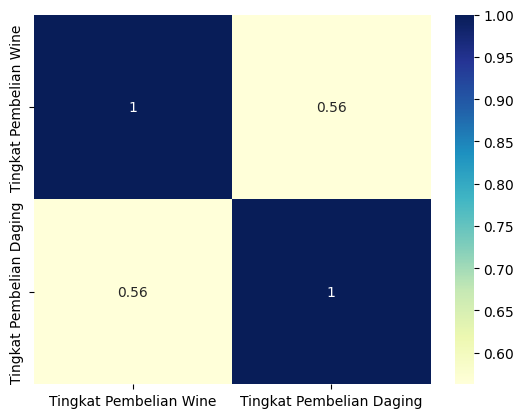

In [ ]:
#KORELASI
sns.heatmap(data_hipo.corr(),annot=True,cmap='YlGnBu')

***KESIMPULAN***

1. Terdapat hubungan antara tingkat pembelian wine dengan tingkat pembelian daging
2. Kekuatan hubungan kedua variabel tergolong sedang dengan nilai 0.56  
3. Koefisien hubungan yang bernilai positif menunjukkan arah yang positif dimana semakin tinggi tingkat pembelian wine maka tingkat pembelian daging juga semakin tinggi, sebaliknya semakin rendah tingkat pembelian wine maka tingkat pembelian daging juga semakin menurun



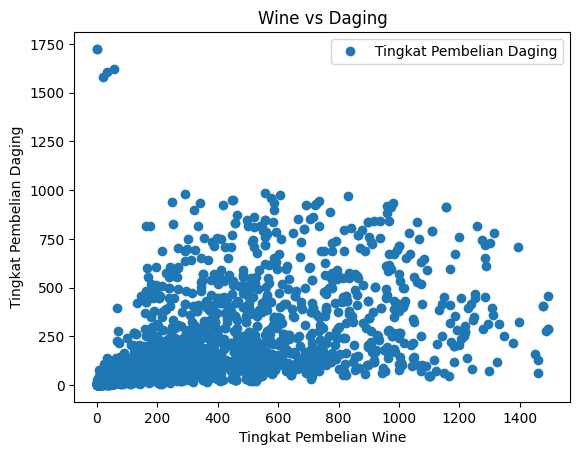

In [ ]:
#REGRESI LINEAR SEDERHANA Y = a + bX
data_hipo.plot(x='Tingkat Pembelian Wine', y='Tingkat Pembelian Daging', style='o')
plt.title('Wine vs Daging')
plt.xlabel('Tingkat Pembelian Wine')
plt.ylabel('Tingkat Pembelian Daging')
plt.show()

<Axes: xlabel='Tingkat Pembelian Wine', ylabel='Tingkat Pembelian Daging'>

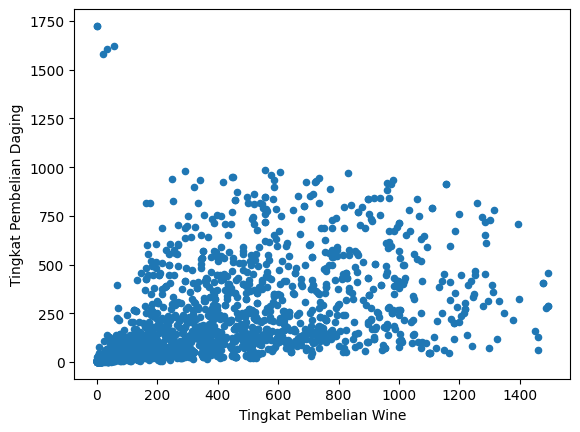

In [ ]:
data_hipo.plot(kind='scatter', x='Tingkat Pembelian Wine', y='Tingkat Pembelian Daging')

In [ ]:
x=data_hipo.iloc[:,:-1].values
y=data_hipo.iloc[:,1].values

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#NILAI a
print(regressor.intercept_)

55.0986645697059


In [ ]:
#NILAI b
print(regressor.coef_)

[0.37011374]


In [ ]:
#NILAI R square
reg.score(x,y)

0.3164703262427111

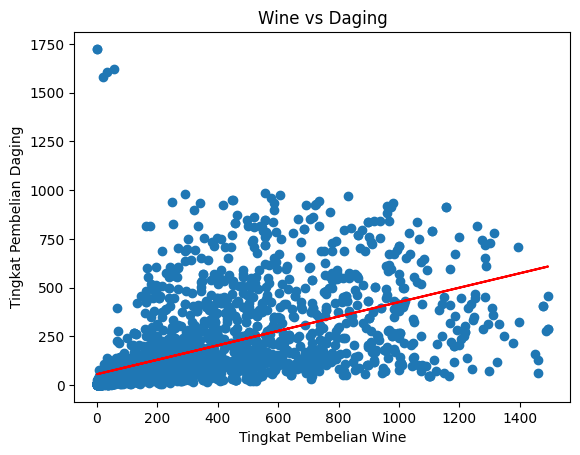

In [ ]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')
plt.title('Wine vs Daging')
plt.xlabel('Tingkat Pembelian Wine')
plt.ylabel('Tingkat Pembelian Daging')
plt.show()

<Axes: xlabel='Tingkat Pembelian Wine', ylabel='Tingkat Pembelian Daging'>

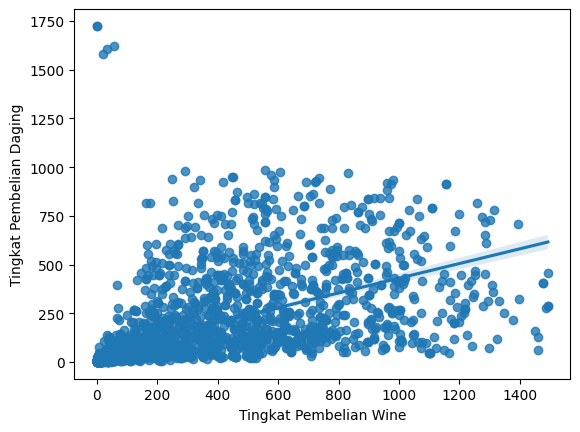

In [ ]:
sns.regplot(x='Tingkat Pembelian Wine',y='Tingkat Pembelian Daging',data=data_hipo)

***KESIMPULAN***

1.   Persamaan Regresi Y = a + bX --> Y = 55,099 + 0,370X
* a = 55,099 --> ketika tidak ada konsumen yang membeli wine (X = 0), pembelian konsumen terhadap daging tetap terjadi sebesar 55,099 kg
* b = 0,37 --> setiap kenaikan pembelian wine sebesar 1 botol, maka pembelian daging akan meningkat sebesar 0.37 kg, sebalikanya setiap penurunan pembelian wine sebesar 1 botol, maka pembelian daging akan menurun sebesar 0.37 kg

2. nilai R square sebesar 0,32 menunjukkan kontribusi tingkat pembelian wine terhadap tingkat pembelian daging sebesar 32%, sisanya 68% dipengaruhi oleh faktor-faktor lain

